In [157]:
using DataFrames
using CSV
using PyPlot
using Statistics

In [1]:
# How many electricity bills do we have for each month from January 2017?
number_of_bills_per_month = [238,269,325,361,409,456,496,532,589,616,632,680,731,794,839,906,940,994,1057,1096,1083,1126]

22-element Array{Int64,1}:
  238
  269
  325
  361
  409
  456
  496
  532
  589
  616
  632
  680
  731
  794
  839
  906
  940
  994
 1057
 1096
 1083
 1126

In [150]:
base_GD = CSV.read("data/Base_GD.csv")
# map(row -> row[:CODIGO_TARIFA1], base_GD)
# map(row -> print(ismissing(row.CODIGO_TARIFA)) ? "ARNAV" : print(row.CODIGO_TARIFA), base_GD)

# for row in eachrow(base_GD)
# #     row = convert(Array,r)
#     if !ismissing(row.CODIGO_TARIFA) && row.CODIGO_TARIFA == "1"
#         println("at least it's not missing")
# #         println(row.CODIGO_TARIFA)
# #         println()
# #         println(typeof(row.CODIGO_TARIFA))
# #         && row.CODIGO_TARIFA === 1
# #         println("found a residencial")
#     end
# #       println(mean())
# end 

# eachrow(select(base_GD,:CODIGO_TARIFA1))

only_residential = filter(row -> (!ismissing(row.CODIGO_TARIFA) && row.CODIGO_TARIFA == "1" && !ismissing(row.ENERGIA_GENERADA) && !ismissing(row.ENERGIA_DEPOSITADA)), base_GD)
# only_residential = filter(row -> row.CODIGO_TARIFA == 1, base_GD)

,ANNO,MES,ENERGIA_GENERADA,ENERGIA_DEPOSITADA,ENERGIA_RETIRADA,IMPORTE_POR_ENERGIA_RETIRADA
,Int64,Int64,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,2018,1,618.0,308.0,308.0,8473.0
2,2018,2,716.0,362.0,362.0,10085.0
3,2018,3,672.0,240.0,240.0,6686.0
4,2018,4,695.0,271.0,271.0,7550.0
5,2018,5,522.0,196.0,196.0,5461.0
6,2018,6,530.0,151.0,151.0,4207.0
7,2018,7,489.0,131.0,131.0,3507.0
8,2018,8,461.0,115.0,115.0,3204.0
9,2018,9,529.0,152.0,152.0,4235.0


In [151]:
# Year      Month Energy generated  Energy Desposited  Withdrawn energy   Amount of energy used        Company        Tariff number   Tariff description   Total consumption
# A           B               C               D               E                   F                       G               H               I                  J              K          L             M                      N               O
# ANNO,     MES,  ENERGIA_GENERADA, ENERGIA_DEPOSITADA,ENERGIA_RETIRADA  IMPORTE_POR_ENERGIA_RETIRADA, EMPRESA, CODIGO_TARIFA,CODIGO_TARIFA1,TOTAL_CONSUMO_KWH,TOTAL_IMPORTE_ENE,Suma de DISTRITO,Recuento de DISTRITO,Provincia1,CONSUMO_NATURAL,SECTOR,Data_Check


# Jose said that column C was energy generated, and O was energy used.
# Which would mean that that's exactly the information that I need.
# The titles don't make the most sense if that's the case, but I'm willing to just go with what he's saying.
jose_selected_columns = select(only_residential, [:ENERGIA_GENERADA,:ENERGIA_DEPOSITADA,:ENERGIA_RETIRADA,:IMPORTE_POR_ENERGIA_RETIRADA,:CONSUMO_NATURAL])

,ENERGIA_GENERADA,ENERGIA_DEPOSITADA,ENERGIA_RETIRADA,IMPORTE_POR_ENERGIA_RETIRADA
,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,618.0,308.0,308.0,8473.0
2,716.0,362.0,362.0,10085.0
3,672.0,240.0,240.0,6686.0
4,695.0,271.0,271.0,7550.0
5,522.0,196.0,196.0,5461.0
6,530.0,151.0,151.0,4207.0
7,489.0,131.0,131.0,3507.0
8,461.0,115.0,115.0,3204.0
9,529.0,152.0,152.0,4235.0


In [161]:
# parse(Float64,jose_selected_columns[:CONSUMO_NATURAL])
# Array{Float32}(jose_selected_columns[:CONSUMO_NATURAL])
# convert(Array{Float64,1}, jose_selected_columns[:CONSUMO_NATURAL])

# consumption_array = map(x->parse(Float64,x),jose_selected_columns[:CONSUMO_NATURAL])
# consumption_array = collect(skipmissing(jose_selected_columns[:CONSUMO_NATURAL]))
consumption_array = collect(skipmissing(jose_selected_columns[:ENERGIA_DEPOSITADA]))

# generation_array = map(x->parse(Float64,x),jose_selected_columns[:ENERGIA_GENERADA])
generation_array = collect(skipmissing(jose_selected_columns[:ENERGIA_GENERADA]))

# describe(consumption_array)
arr_std = std(consumption_array)
arr_mean = mean(consumption_array)
filtered_consumption_array = filter(arr_val -> (abs(arr_mean - arr_val) < arr_std),consumption_array)

# jose_selected_columns = select(row -> (!ismissing(row.CODIGO_TARIFA) && row.CODIGO_TARIFA == "1"), , [:ENERGIA_GENERADA,:ENERGIA_DEPOSITADA,:ENERGIA_RETIRADA,:IMPORTE_POR_ENERGIA_RETIRADA,:CONSUMO_NATURAL])
# only_residential = filter(row -> (!ismissing(row.CODIGO_TARIFA) && row.CODIGO_TARIFA == "1"), base_GD)


# Okay I'm running into a new issue now where some of the values aremissing, so there's uneven amounts of data
# Are there any where they're roughly equal lengths?
# Generada: 8717
# Deposidata: 8712
# Retirada: 8710
# IMPORTE_POR_ENERGIA_RETIRADA: 8647

# So each of them is missing in different ones. In that case I don't know what to do



# jose_selected_columns[:ENERGIA_GENERADA]
# collect(skipmissing(jose_selected_columns[:ENERGIA_GENERADA]))





# describe(jose_selected_columns)
# What's the actual energy that these residential consumers used?
# I'll begin by seeing if it's D, just for kicks
# See if graphical comparison is even a valid method of comparison
# restricted_only_residential
# restricted_only_residential = select(only_residential, [:ENERGIA_GENERADA,:ENERGIA_DEPOSITADA])


# Create a new column that calculates ENERGIA_GENERADA - ENERGIA_DEPOSITADA + ENERGIA_RETIRADA
# My guess is that this should be equal to IMPORTE_POR_ENERGIA_RETIRADA

# Reconstructed_Energy_Summation = base_GD[:ENERGIA_DEPOSITADA] - base_GD[:ENERGIA_RETIRADA]

# describe(Reconstructed_Energy_Summation)

# base_GD[:IMPORTE_POR_ENERGIA_RETIRADA]

# I'm way off, even just looking at the data that's the completely wrong order of magnitude.
# So I'm not sure what the columns mean in that case.
# I should ask Jose for clarification on what the columns are, because I'm clearly not translating them correctly

# But the ones I am fairly confident are, are 

# So looking at these, it looks like one thing I can try is doing C - D + E
# Because if the other one is an order of magnitude off, odds are I'm just incorrect in assessing that.
# Also let me see one thing, is C = D + E? Ya for some people it's super close to 0. For others it's very off, but it's in the ballpark
# Which means it's possible that 
# Or how about Total Energy Used = Energy Generated + Energy Withdrawn - Energy Deposited, aka C - D + E
# How about I try with that for now, just graph that in comparison with the ideal
# I want to see how close this gets

# Hold up, apparently D is almost equal to E. for a lot of these. Yeah there's a lot that are exactly equal.
# So what are those? oh wait. I think that E is how much of what YOU put in did YOU put back
# But then why are there some positive and some negative? That doesn't make much sense.

# The mean of that is 92, so it's overall positive. Median is 0

# insertcols!(base_GD, 3, Reconstructed_Energy_Summation :=Reconstructed_Energy_Summation)

8657-element Array{Float64,1}:
 308.0
 362.0
 240.0
 271.0
 196.0
 151.0
 131.0
 115.0
 152.0
 157.0
   0.0
 283.0
 153.0
   ⋮  
 440.0
   0.0
   0.0
 245.0
 255.0
  57.0
 258.0
   0.0
   0.0
 225.0
   0.0
  65.0

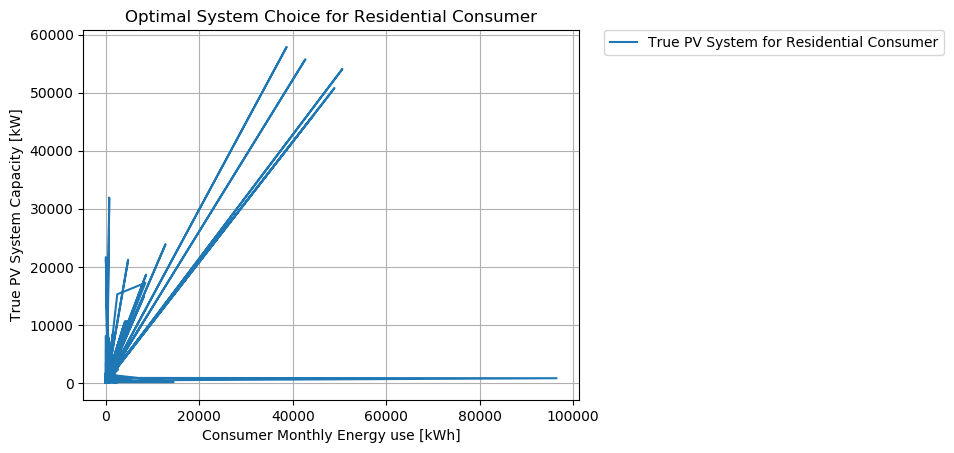

PyObject Text(0.5, 1.0, 'Optimal System Choice for Residential Consumer')

In [153]:
# Plot out the actual PV system sizes that people have based on their energy bills

# it needs to be a StepRange and an Array?

# there's an issue for the generation_array

# pyplot()
plot(consumption_array, generation_array, label = "True PV System for Residential Consumer")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ylabel("True PV System Capacity [kW]")
xlabel("Consumer Monthly Energy use [kWh]")
grid("on");
title("Optimal System Choice for Residential Consumer")